In [1]:
dataset = "Healthy"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import mean
from numpy import std
from sklearn.preprocessing import LabelEncoder as le
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [3]:
df = pd.read_csv(dataset+'.csv')
df.head()

,speed,vibration
0,4.188767,-0.002199
1,4.200603,-0.001871
2,4.208165,-0.001542
3,4.226576,-0.001871
4,4.240385,-0.002199


In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
window = 50

In [6]:
df['vibration_SMA'] = df.iloc[:,1].rolling(window=window).mean()
df

,speed,vibration,vibration_SMA
0,4.188767,-0.002199,NaN
1,4.200603,-0.001871,NaN
2,4.208165,-0.001542,NaN
3,4.226576,-0.001871,NaN
4,4.240385,-0.002199,NaN
...,...,...,...
1048570,4.287071,-0.003186,0.002766
1048571,0.163581,-0.004501,0.002503
1048572,0.036346,-0.004830,0.002214
1048573,0.036675,-0.005817,0.001911


In [7]:
df = df.dropna()
df

,speed,vibration,vibration_SMA
49,0.036346,0.004049,-0.000680
50,0.037003,0.003720,-0.000562
51,0.036346,0.005693,-0.000411
52,0.036346,0.005035,-0.000279
53,0.036017,0.005693,-0.000128
...,...,...,...
1048570,4.287071,-0.003186,0.002766
1048571,0.163581,-0.004501,0.002503
1048572,0.036346,-0.004830,0.002214
1048573,0.036675,-0.005817,0.001911


In [8]:
df = df.iloc[0:1000]
df

,speed,vibration,vibration_SMA
49,0.036346,0.004049,-0.000680
50,0.037003,0.003720,-0.000562
51,0.036346,0.005693,-0.000411
52,0.036346,0.005035,-0.000279
53,0.036017,0.005693,-0.000128
...,...,...,...
1044,0.036675,-0.000884,-0.004672
1045,0.026811,0.001089,-0.004600
1046,0.037003,0.002076,-0.004488
1047,0.036346,0.002076,-0.004350


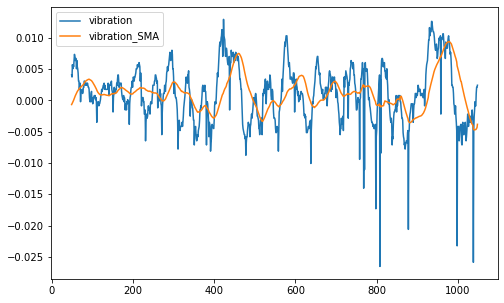

In [9]:
df['vibration'].plot(figsize=(8,5))
df['vibration_SMA'].plot(figsize=(8,5))

plt.legend(loc='upper left')
plt.show()

<ipython-input-10-d949033bb869>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="speed", y="vibration", data=df.reset_index(), palette="tab10")
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
<i

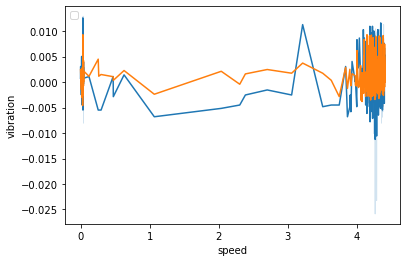

In [10]:
sns.lineplot(x="speed", y="vibration", data=df.reset_index(), palette="tab10")
sns.lineplot(x="speed", y="vibration_SMA", data=df.reset_index(), palette="tab10")
plt.legend(loc='upper left')
plt.show()

In [11]:
upper_boundary_speed = 3.5
lower_boundary_speed = 0
df2 = df[(df['speed']<upper_boundary_speed) & (df['speed']>lower_boundary_speed)]
df2

,speed,vibration,vibration_SMA
49,0.036346,0.004049,-0.000680
50,0.037003,0.003720,-0.000562
51,0.036346,0.005693,-0.000411
52,0.036346,0.005035,-0.000279
53,0.036017,0.005693,-0.000128
...,...,...,...
1044,0.036675,-0.000884,-0.004672
1045,0.026811,0.001089,-0.004600
1046,0.037003,0.002076,-0.004488
1047,0.036346,0.002076,-0.004350


No handles with labels found to put in legend.


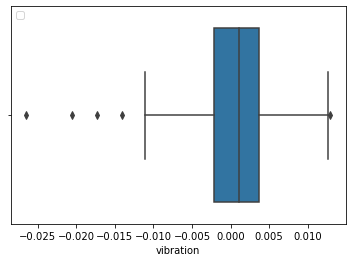

In [12]:
sns.boxplot(x=df2['vibration'])
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


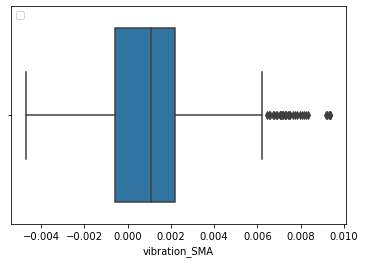

In [13]:
sns.boxplot(x=df2['vibration_SMA'])
plt.legend(loc='upper left')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No handles with labels found to put in legend.


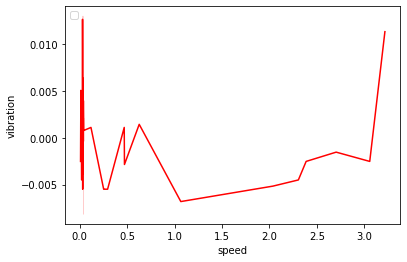

In [14]:
sns.lineplot(x='speed', y='vibration', data=df2, color='red')
plt.legend(loc='upper left')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No handles with labels found to put in legend.


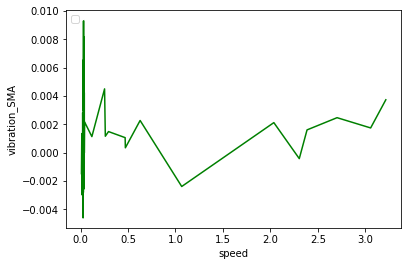

In [15]:
sns.lineplot(x='speed',y='vibration_SMA',data=df2,color='green')
plt.legend(loc='upper left')
plt.show()

In [16]:
data_mean, data_std = mean(df2.vibration_SMA), std(df2.vibration_SMA)
cut_off = data_std * 4
lower, upper = data_mean - cut_off, data_mean + cut_off
data_mean, data_std, lower, upper, cut_off

(0.0011146727136489153,
 0.002637864007321939,
 -0.00943678331563884,
 0.01166612874293667,
 0.010551456029287755)

In [17]:
lower_boundary = lower
upper_boundary = upper
df3 = df2[(df2['vibration_SMA']<upper_boundary) & (df2['vibration_SMA']>lower_boundary)]
df3.head()

,speed,vibration,vibration_SMA
49,0.036346,0.004049,-0.000680
50,0.037003,0.003720,-0.000562
51,0.036346,0.005693,-0.000411
52,0.036346,0.005035,-0.000279
53,0.036017,0.005693,-0.000128


No handles with labels found to put in legend.


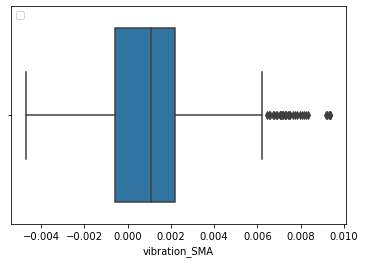

In [18]:
sns.boxplot(x=df3['vibration_SMA'])
plt.legend(loc='upper left')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
No handles with labels found to put in legend.


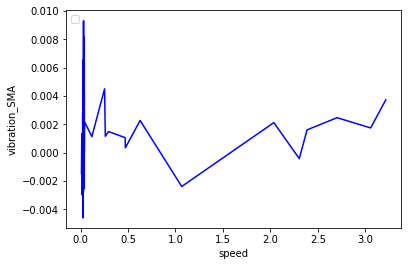

In [19]:
sns.lineplot(x='speed',y='vibration_SMA',data=df3,color='blue')
plt.legend(loc='upper left')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

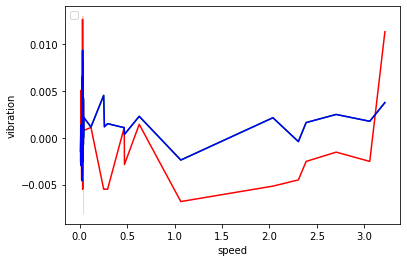

In [20]:
sns.lineplot(x='speed',y='vibration',data=df2,color='red')
sns.lineplot(x='speed',y='vibration_SMA',data=df2,color='green')
sns.lineplot(x='speed',y='vibration_SMA',data=df3,color='blue')
plt.legend(loc='upper left')
plt.show()

In [21]:
finalised = df3
finalised['Faults'] = dataset
finalised

,speed,vibration,vibration_SMA,Faults
49,0.036346,0.004049,-0.000680,Healthy
50,0.037003,0.003720,-0.000562,Healthy
51,0.036346,0.005693,-0.000411,Healthy
52,0.036346,0.005035,-0.000279,Healthy
53,0.036017,0.005693,-0.000128,Healthy
...,...,...,...,...
1044,0.036675,-0.000884,-0.004672,Healthy
1045,0.026811,0.001089,-0.004600,Healthy
1046,0.037003,0.002076,-0.004488,Healthy
1047,0.036346,0.002076,-0.004350,Healthy


In [22]:
finalised.to_csv(dataset+'-moving-average.csv', index=False)

In [23]:
dropouts = len(df) - len(finalised)
print("Total Discarded values = " + str(dropouts))

Total Discarded values = 493


In [24]:
df = pd.read_csv(dataset+'-moving-average.csv')
df

,speed,vibration,vibration_SMA,Faults
0,0.036346,0.004049,-0.000680,Healthy
1,0.037003,0.003720,-0.000562,Healthy
2,0.036346,0.005693,-0.000411,Healthy
3,0.036346,0.005035,-0.000279,Healthy
4,0.036017,0.005693,-0.000128,Healthy
...,...,...,...,...
502,0.036675,-0.000884,-0.004672,Healthy
503,0.026811,0.001089,-0.004600,Healthy
504,0.037003,0.002076,-0.004488,Healthy
505,0.036346,0.002076,-0.004350,Healthy
